# Histogram obrazu. Wyrównywanie histogramu.

## Cel ćwiczenia

- Zapoznanie z pojęciem histogramu obrazu (w odcieniach szarości i kolorze).
- Zapoznanie z metodami modyfikacji histogramu (rozciąganie, wyrównywanie, dopasowywanie).

## Histogram

- Histogramem obrazu nazywamy wykres słupkowy zdefiniowany następującymi zależnościami:<br>
\begin{equation}
h(i) = \sum_{x=0}^{N-1} \sum_{y=0}^{M-1} p(i,(x,y))
\end{equation}<br>
gdzie:<br>
\begin{equation}
p(i) =  \left\{
  \begin{array}{l l}
    1 & \quad \text{gdy} f(x,y) = i\\
    0 & \quad \text{gdy} f(x,y) \ne i
  \end{array} \right.
\end{equation}

- Inaczej mówiąc, histogram zawiera informacje na temat tego ile pikseli o danym poziomie jasności występuje na obrazie (w przypadku obrazu w odcieniach szarości). Określa się to także rozkładem empirycznym cechy.

- Często wykorzystuje się tzw. znormalizowaną postać histogramu  – wszystkie wartości $h(i)$ są dzielone przez liczbę pikseli na obrazie.
Otrzymana w ten sposób wielkość to gęstość prawdopodobieństwa wystąpienia na obrazie pikseli o odcieniu $i$.

- Histogram można zdefiniować również dla obrazów kolorowych.
Otrzymujemy wtedy 3 histogramy – po jednym dla danej składowej: R,G,B (lub HSV, YCbCr, itp.) lub histogram trójwymiarowy.

- Histogram jest bardzo użyteczny w przetwarzaniu i analizie obrazów.
Wykorzystywany jest przy binaryzacji (szerzej na jednym z kolejnych laboratoriów) oraz do oceny jakości (dynamiki, kontrastu) obrazu.
W idealnym przypadku wszystkie poziomy jasności w obrazie powinny być wykorzystane (i to najlepiej w miarę jednolicie)  – obrazowo mówiąc histogram powinien rozciągać się od 0  – 255 (obraz w skali szarości).

- W przypadku gdy  wykorzystujemy jedynie fragment dostępnego zakresu (wąski histogram)  lub histogram nie jest jednolity (występują dominujące grupy pikseli) obraz ma dość słaby kontrast.
Cechę tę można poprawić stosując tzw. rozciąganie albo wyrównywanie histogramu (ang. *histogram equalization*).</div>

## Histogram dla obrazów w odcieniach szarości

1. Zaimportuj potrzebne biblioteki: *OpenCV*, *pyplot* z *matplotlib* i *numpy*.
        import cv2
        from matplotlib import pyplot as plt
        import numpy as np
2. Wczytaj obrazy *lenaX.bmp* w skali szarości. *X* jest numerem wczytywanego obrazu (1 - 4).
        I = cv2.imread('lenaX.bmp', cv2.IMREAD_GRAYSCALE)
3. Oblicz histogram wczytanego obrazu wykorzystując funkcję `cv2.calcHist`.
    - Pierwszym argumentem jest obraz, dla którego obliczony zostanie histogram.
    Należy go przekazać w nawiasie kwadratowym.
    - Drugim argumentem jest numer kanału, dla którego ma zostać obliczony histogram.
    Również powinien być przekazany w nawiasie kwadratowym.
    - Trzeci argument oznacza maskę, czyli obszar, dla którego ma zostać wyznaczony histogram.
    Aby obliczyć dla całego obrazu należy przekazać *None*.
    - Czwartym argumentem jest rozmiar histogramu (liczba przedziałów).
    Argument powinien być w nawiasie kwadratowym. Dla pełnej skali należy przekazać wartość *256*.
    - Ostatnim argumentem jest zakres wartości. Dla obrazów typu *uint8* powinien on wynosić *[0, 256]*.
    - Funkcja zwraca obliczony histogram.
4. Wyświetl wczytane obrazy i ich histogramy w jednym oknie. Użyj `plt.subplot()` w celu stworzenia siatki wykresów.
        figLena, axsLena = plt.subplots(2, 4)
Rozmiar utworzonego okna można zmienić wykorzystując instrukcję (uwaga w calach -  1 cal to 2.54cm):
        figLena.set_size_inches(20, 10)
Przykładowe wyświetlenie obrazu:
        axsLena[0, 0].imshow(I1, 'gray', vmin=0, vmax=256)
        axsLena[0, 0].axis('off')
Przykładowe wyświetlenie histogramu:
        axsLena[1, 0].plot(H1)
        axsLena[1, 0].grid()
5. Przeanalizuj (dokładnie) związek histogramu z jasnością i ostrością obrazu (tu rozumianą jako subiektywne odczucie).

In [1]:
import cv2
import os
import requests
from matplotlib import pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/03_Histogram/'

fileName = 'lena1.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

fileName = 'lena2.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

fileName = 'lena3.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

fileName = 'lena4.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

In [2]:
def print_image(img): 
    plt.xticks([])
    plt.yticks([])
    plt.gray()
    plt.imshow(img)

In [3]:
I1 = cv2.imread("lena1.bmp", cv2.IMREAD_GRAYSCALE)
I2 = cv2.imread("lena2.bmp", cv2.IMREAD_GRAYSCALE)
I3 = cv2.imread("lena3.bmp", cv2.IMREAD_GRAYSCALE)
I4 = cv2.imread("lena4.bmp", cv2.IMREAD_GRAYSCALE)

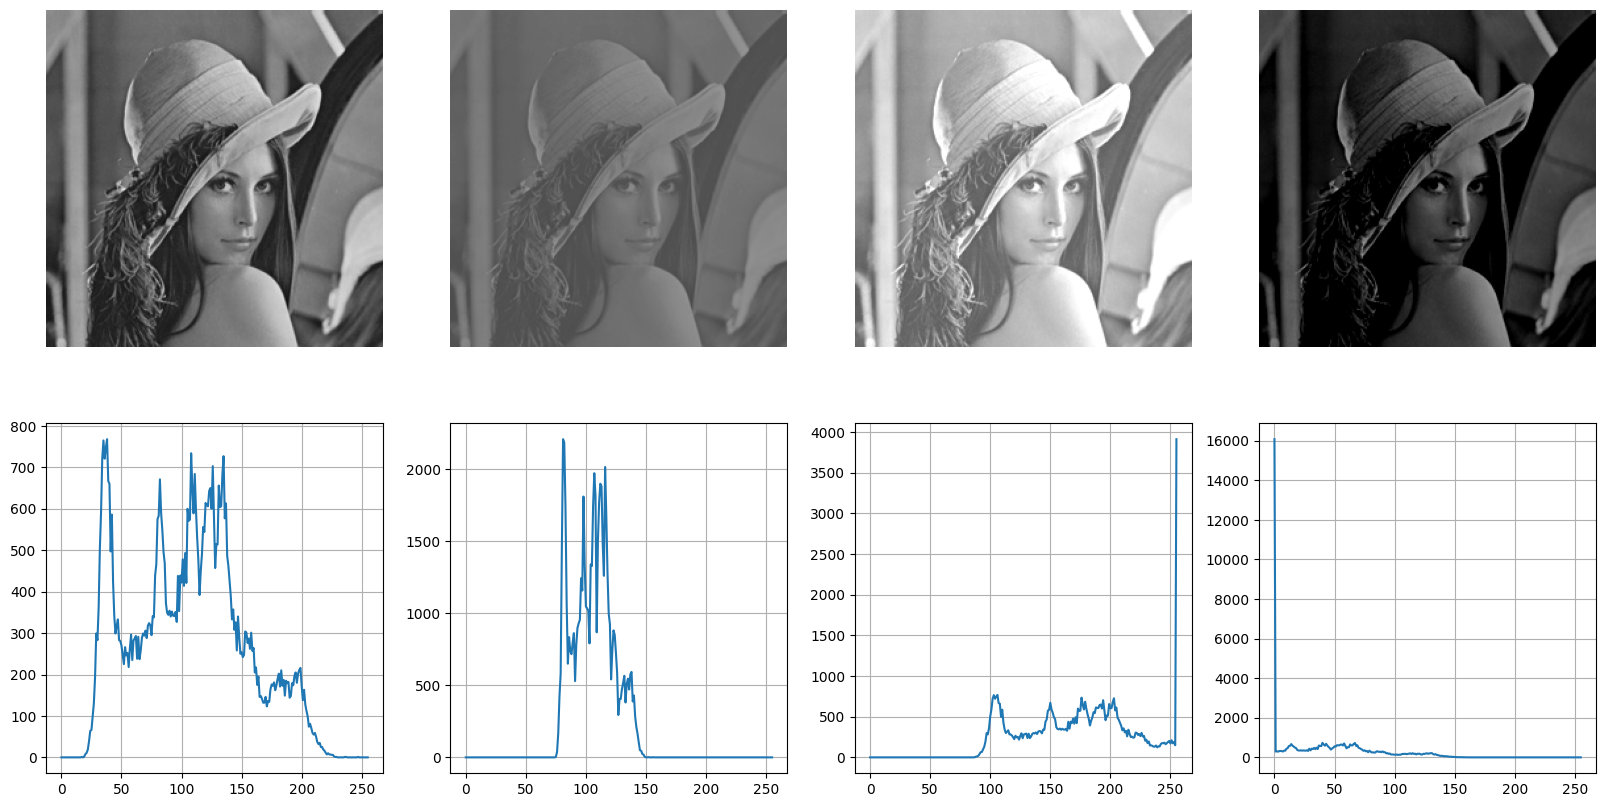

In [4]:
figLena, axsLena = plt.subplots(2, 4)
figLena.set_size_inches(20, 10)

for i, img in enumerate([I1, I2, I3, I4]):
    histogram = cv2.calcHist([img], [0], None, [256], [0, 256])
    axsLena[0, i].imshow(img, 'gray', vmin=0, vmax=256)
    axsLena[0, i].axis('off')
    axsLena[1, i].plot(histogram)
    axsLena[1, i].grid()

## Rozciąganie histogramu

Najprostszą metodą poprawienia jakości obrazu jest tzw. rozciągnięcie histogramu.
Polega na przeskalowaniu wartości pikseli w obrazie tak, aby wykorzystać cały dostępny zakres [0-255] (oczywiście w przypadku obrazów w odcieniach szarości w reprezentacji 8-bitowej).

1. Wczytaj obraz *hist1.bmp* w skali szarości.
Oblicz i wyświetl histogram rozpatrywanego obrazu (na wspólnym rysunku z obrazem).
Zwróć uwagę na ilość widocznych szczegółów.
2. Rozciągnij histogram obrazu. W tym celu można wykorzystać funkcję `cv2.normalize`.
    - Pierwszym argumentem funkcji jest obraz poddawany operacji.
    - Drugim argumentem jest tablica do której zostanie wpisany wynik.
    Należy ją najpierw zainicjalizować.
    Najlepiej zrobić to funkcją `np.zeros`, której pierwszym argumentem jest rozmiar obrazu (`I.shape`), a drugim typ danych (`uint8`).
    Można również przekazać `None`, a wynik przypisać do nowej zmiennej.
    - Trzecim argumentem jest minimalna wartość po normalizacji.
    - Czwartym argumentem jest wartość maksymalna po normalizacji.
    - Ostatnim argumentem jest typ wykorzystanej normy (uogólnienie pojęcia długości wektora).
    Należy wykorzystać normę `cv2.NORM_MINMAX`.
3. Wyświetl obraz oryginalny, po wykonanej operacji oraz ich histogramy.
4. Czy ilość "widocznych" szczegółów uległa zmianie?

In [5]:
fileName = 'hist1.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

fileName = 'hist2.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

fileName = 'hist3.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

fileName = 'hist4.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

### Wczytywanie obrazu i jego znormalizowany histogram

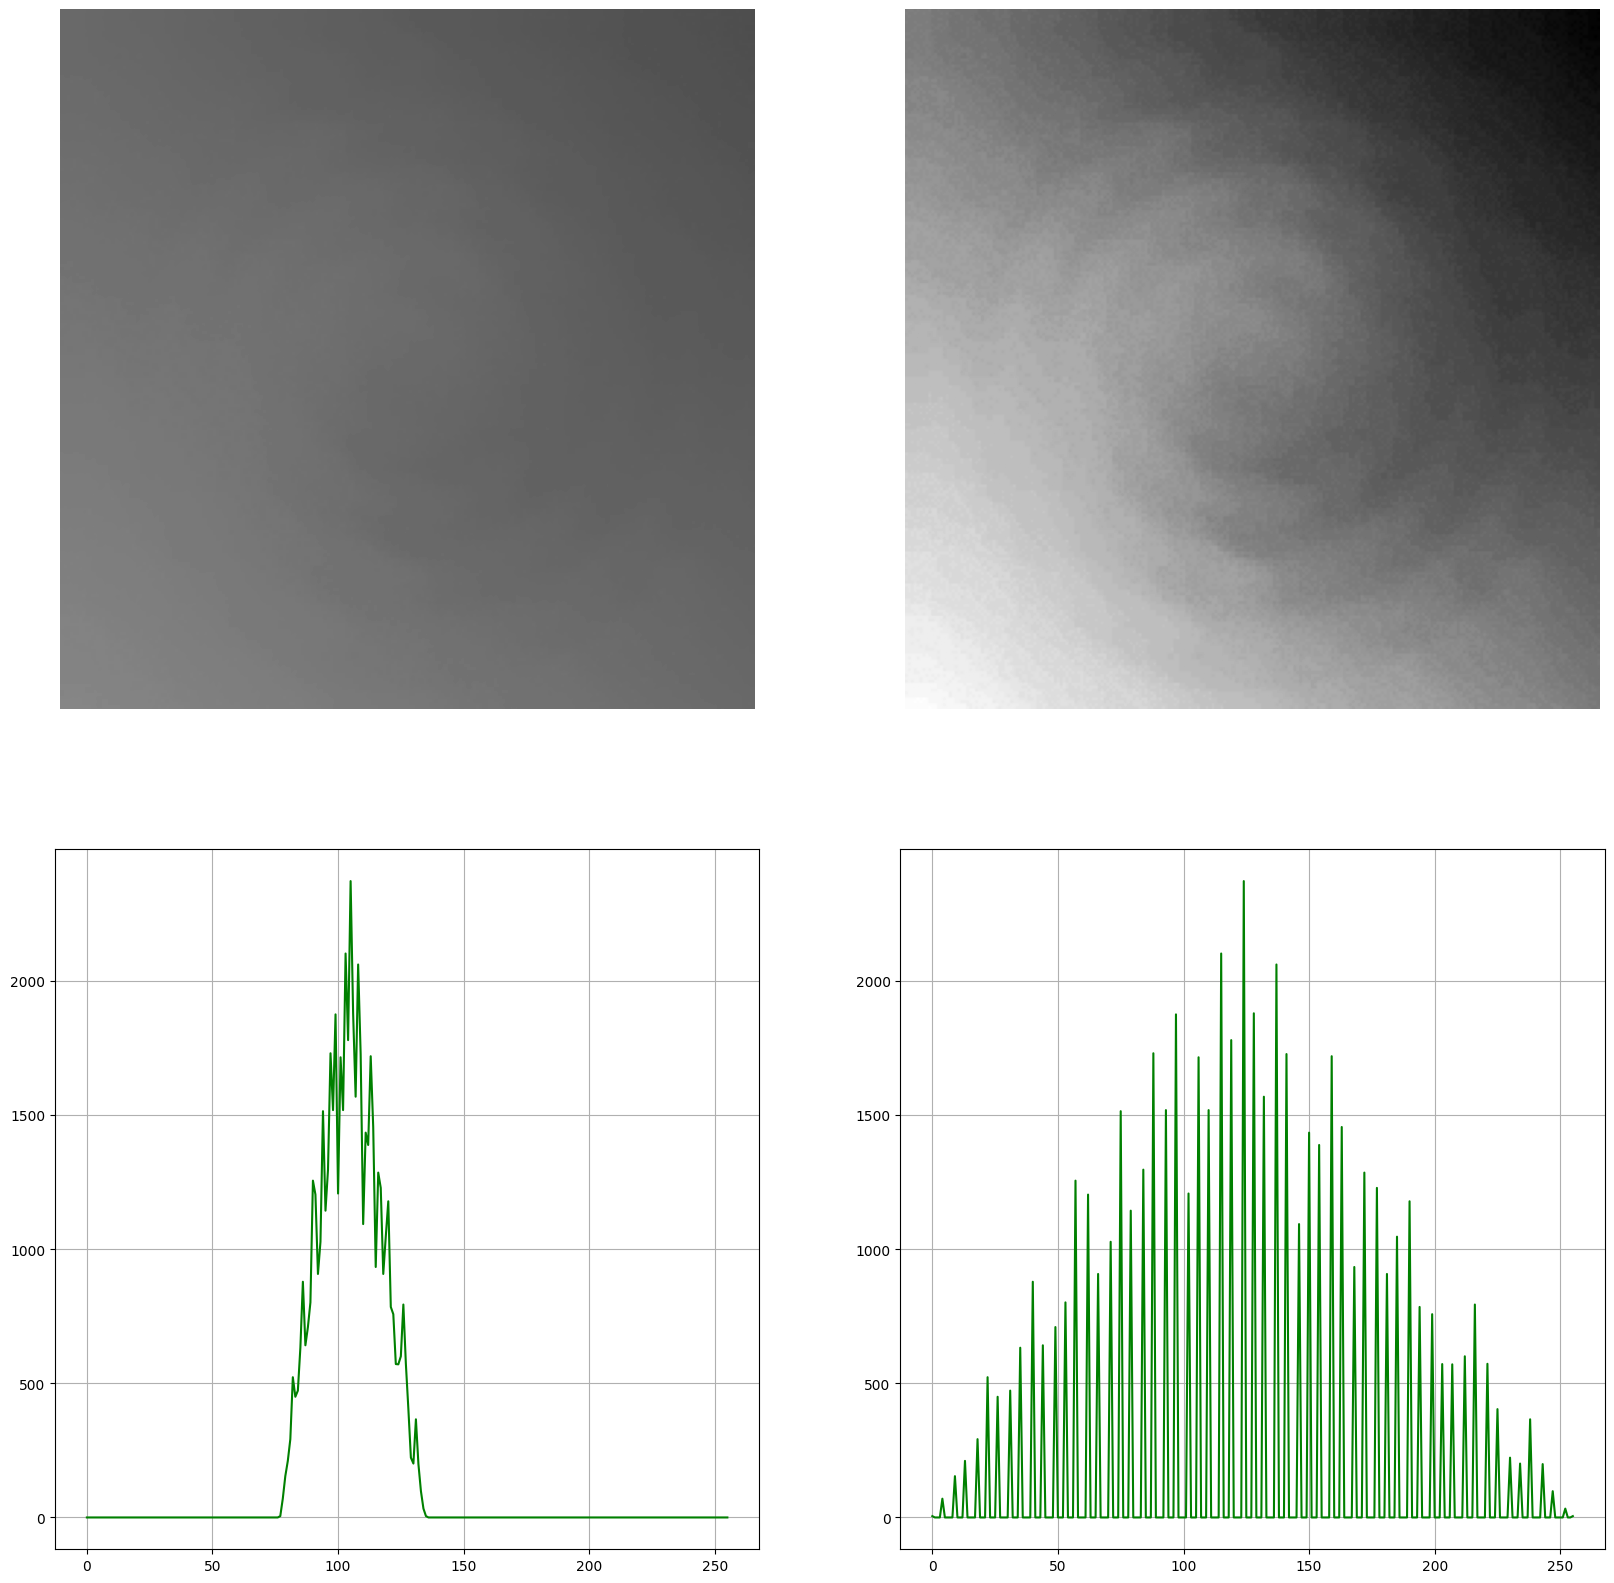

In [6]:
img = cv2.imread('hist1.bmp', cv2.IMREAD_GRAYSCALE)
normalized_img = cv2.normalize(img, None, 0, 256, cv2.NORM_MINMAX)

fig, axs = plt.subplots(2, 2)
fig.set_size_inches(20, 20)

for i, img in enumerate([img, normalized_img]):
    axs[0, i].imshow(img, 'gray', vmin=0, vmax=256)
    axs[0, i].axis('off')

    histogram = cv2.calcHist([img], [0], None, [256], [0, 256])

    axs[1, i].plot(histogram, c='green')
    axs[1, i].grid()

## Wyrównywanie histogramu

<div style="text-align: justify">
Bardziej zaawansowaną metodą jest tzw. wyrównywanie histogramu (ang. *histogram equalization – HE*).
Idea jest następująca: z punktu widzenia lepszego wykorzystania dostępnych poziomów jasności pożądane jest rozciągnięcie "szczytów" histogramu, a~skompresowanie "dolin" tak, aby taka sama liczba pikseli reprezentowana była przez każdy z dostępnych poziomów jasności (a przynjamniej przybliżona).
Warto zwrócić uwagę, że takie przekształcenie powoduje częściową utratę informacji o szczegółach w obszarach "dolin".
Inaczej mówiąc, dążymy do sytuacji, aby histogram był względnie jednostajny.
Operacją, która pozwala wykonać wyrównywanie histogramu, jest przekształcenie LUT z funkcją przejścia w postaci histogramu skumulowanego danego obrazu.</div><br>

<div style="text-align: justify">
Histogram skumulowany to funkcja obliczona na podstawie histogramu.
Jej pierwszy element to liczba pikseli o odcieniu $0$.
Kolejne wartości to liczba pikseli o odcieniach od $0$ do $n$.</div>

\begin{equation}
C(n) = \sum_{i=0}^{n} h(i)
\end{equation}

<div style="text-align: justify">
Jeżeli histogram jest w postaci znormalizowanej (gęstość rozkładu prawdopodobieństwa) to histogram skumulowany stanowi dystrybuantę rozkładu prawdopodobieństwa.</div><br>

1. Wyznacz histogram skumulowany dla obrazu *hist1.bmp*.
W tym celu wykorzystaj metodę `cumsum` dla histogramu wczytanego obrazu.
Nie przyjmuje ona żadnych argumentów, a zwraca skumulowane wartości tablicy, dla której została użyta.
Histogram należy wyliczyć dla **obrazka wejściowego**, a nie dla wyniku rozciągania.
2. Histogram skumulowany wyświetl razem z histogramem zwykłym na jednym wykresie (nie obok siebie).
Na potrzeby wyświetlenia przeskaluj histogram skumulowany tak, by miał taką samą wartość maksymalną jak zwykły histogram.
W tym celu wykorzystaj metodę `max`.
3. Wyświetlenie kilku linii na jednym wykresie może być zrealizowane w następujący sposób:
        figHistCum, axsHistCum = plt.subplots()

        axsHistCum.plot(HHist)
        axsHistCum.plot(CHistNorm)
        axsHistCum.grid()
4. Teraz zaimplementuj klasyczny algorytm wyrównywania histogramu.
Wykorzystać należy obliczony histogram skumulowany.
Należy go przeskalować w taki sposób aby na jego podstawie zrealizować przekształcenie LUT, czyli do zakresu 0 - 255.

>Uwaga. Opisany algorytm wyrównywania histogramu jest wersją uproszczoną.
>W wersji pełnej należy podczas skalowania tablicy przekodowań LUT pominąć elementy równe *0*.
>
>W tym celu należy wykorzystać funkcje `np.ma.masked_equal` i `np.ma.filled`.
>Pierwsza służy do ukrywania elementów tablicy, natomiast druga zamienia ukryte elementy na podaną wartość.
>W tym przypadku elementem ukrywanym i wpisywaną wartością byłoby *0*.

5. Na kolejnym rysunku wyświetl obrazek po przekształceniu, jego histogram oraz histogram skumulowany.
Co szczególnego można powiedzieć o jego histogramie i histogramie skumulowanym?
6. W bibliotece *OpenCV* dostępna jest funkcja wykonująca wyrównywanie histogramu `cv2.equalizeHist`.
Jej argumentem jest obraz, którego histogram zostanie wyrównany. Zwraca natomiast obraz wynikowy.
Na kolejnym rysunku wyświetl wynik funkcji, jego histogram oraz histogram skumulowany.
7. W wykorzystywanej bibliotece zaimplementowana jest również metoda adaptacyjnego wyrównywania histogramu algorytmem CLAHE (ang. *Contrast Limited Adaptive Histogram Equalization*}.
   Kilka słów wyjaśnienia.
   Wadą poznanej metody HE jest jej "globalność" rozumiana jako nieuwzględnianie lokalnych właściwości obrazu.
   Dlatego też powstała metoda adaptacyjnego wyrównywania histogramu (AHE).
   Jest ona spotykana w dwóch wariantach:
   - dla każdego piksela niezależnie, w pewnym jego otoczeniu, wyznaczany jest histogram i przeprowadzane wyrównywanie.
     Jak nietrudno się domyślić rozwiązanie jest dość kosztowne obliczeniowo.
   - obraz wejściowy dzielony jest na nienachodzące na siebie prostokątne okna.
     W każdym z okien obliczany jest histogram i przeprowadzane jest wyrównywanie.
     W celu eliminacji błędów na granicy okien, stosuje się interpolację.

   Metoda AHE ma jednak tą wadę, że w obszarach jednorodnych wzmacnia szum.
   Dlatego też zaproponowano rozwiązanie CLAHE, które zakłada ograniczenie kontrastu (CL).
   W metodzie definiuje się maksymalną wartość danego przedziału histogramu (próg ograniczenia kontrastu).
   Piksele, które przekraczają próg są następnie równomiernie rozdzielane pomiędzy poszczególne przedziały.
   Bardziej szczegółowy opis obu metod dostępny jest na [Wikipedii](https://en.wikipedia.org/wiki/Adaptive_histogram_equalization).

8.W celu użycia algorytmu należy wywołać funkcję `cv2.createCLAHE`.
    - Pierwszym parametrem jest próg ograniczenia kontrastu.
    - Drugi parametr definiuje na ile prostokątów zostanie podzielony obraz w rzęch i kolumnach.
    - Zwracany jest zainicjalizowany *smart pointer* do klasy `cv::CLAHE`.
9. Aby wykonać wyrównywanie należy użyć metody `apply`.
Jej argumentem jest obraz wejściowy. Zwracany jest obraz o zmodyfikowanym histogramie.
10. Przetestuj różne parametry algorytmu CLAHE.
11. W kolejnym etapie należy przetestować operacje (rozciąganie, wyrównywanie (HE) i adaptacyjne wyrównywanie CLAHE)  na histogramie dla obrazów rzeczywistych. *hist2.bmp*, *hist3.bmp*, *hist4.jpg*.
W jednym oknie wyświetl: obraz oryginalny, rozciąganie, wyrównywanie HE oraz wyrównywanie CLAHE.

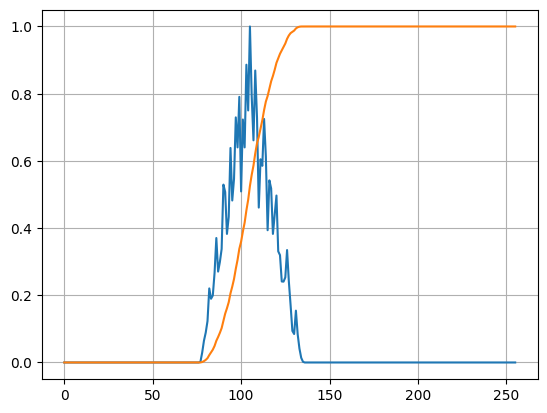

In [7]:
img = cv2.imread('hist1.bmp', cv2.IMREAD_GRAYSCALE)
histogram = cv2.calcHist([img], [0], None, [256], [0, 256])
acc_histogram = np.cumsum(histogram)

figHistCum, axsHistCum = plt.subplots()

axsHistCum.plot(histogram / np.max(histogram))
axsHistCum.plot(acc_histogram / np.max(acc_histogram))
axsHistCum.grid()

In [18]:
def equalize_histogram(img):
    histogram = cv2.calcHist([img], [0], None, [256], [0, 256])
    acc_histogram = np.cumsum(histogram)
    
    equalized_img = (acc_histogram[img] - np.min(acc_histogram)) / (img.size - np.min(acc_histogram)) * 255
    return equalized_img

In [19]:
equalized_img = equalize_histogram(img)
equalized_img_cv = cv2.equalizeHist(img)

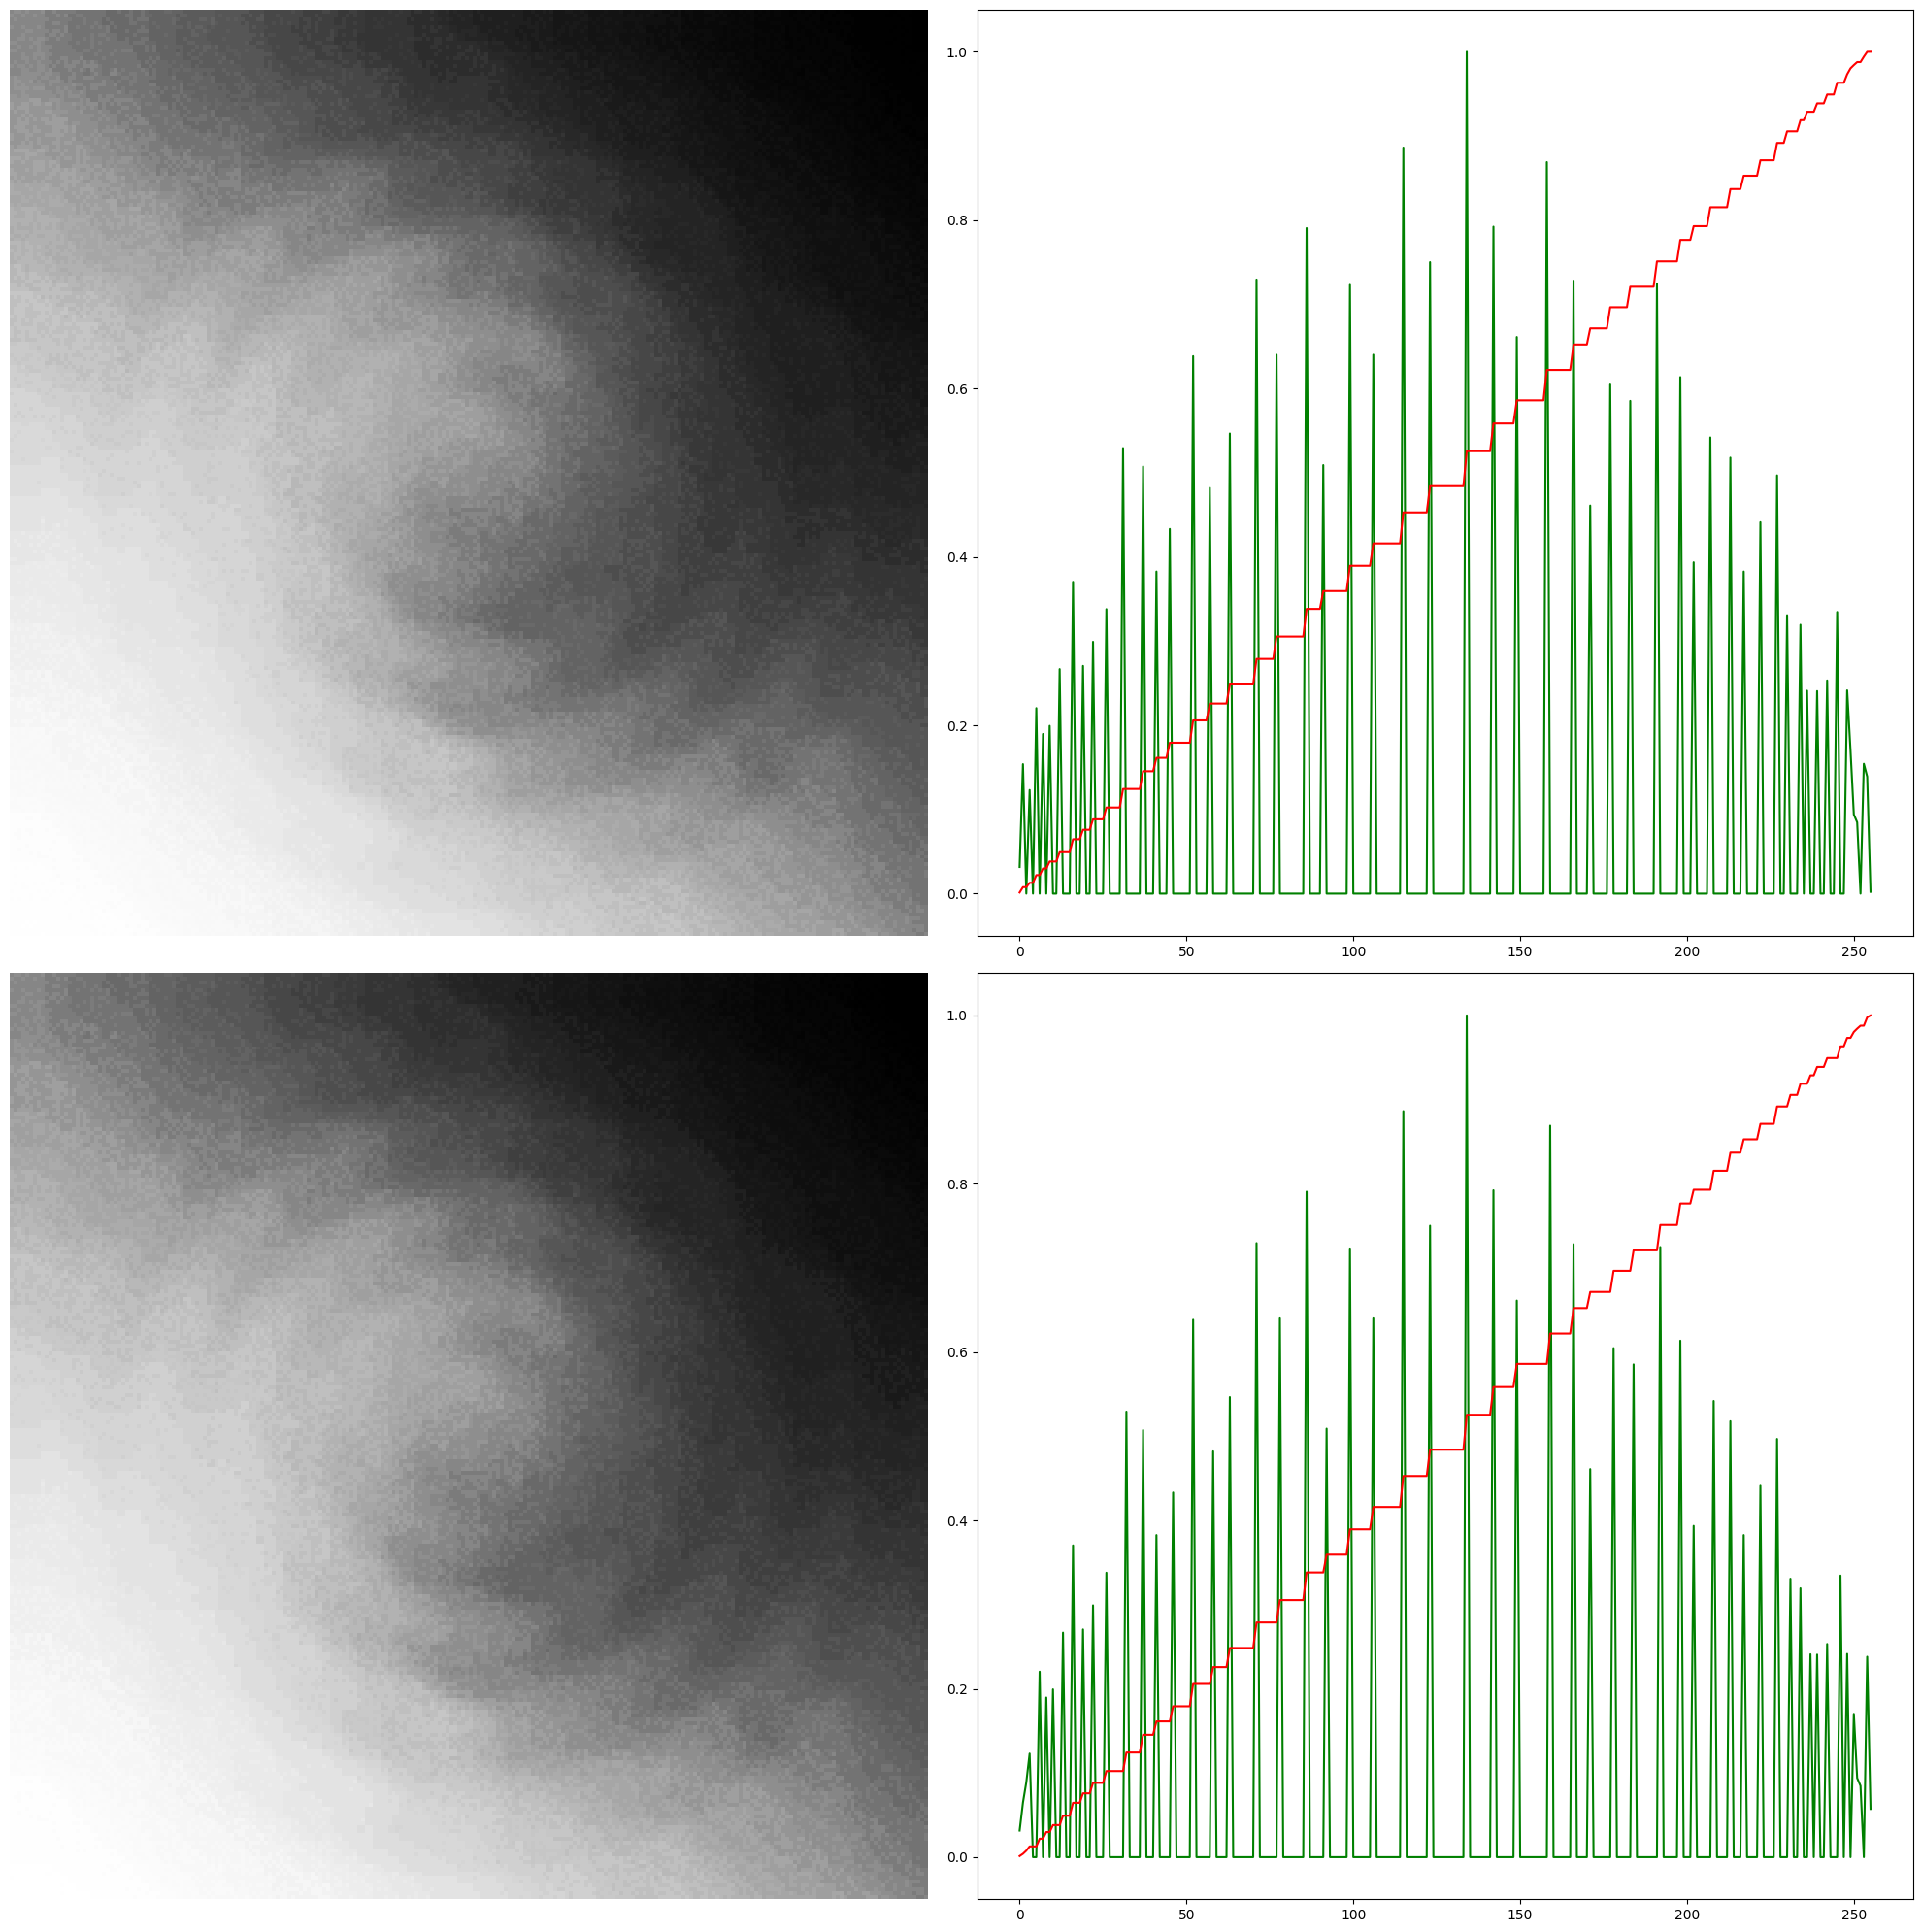

In [10]:
fig, axs = plt.subplots(2, 2)
fig.set_size_inches(20, 20)


axs[0, 0].imshow(equalized_img, 'gray', vmin=0, vmax=256)
axs[0, 0].axis('off')

histogram = cv2.calcHist([equalized_img], [0], None, [256], [0, 256])
acc_histogram = np.cumsum(histogram)

axs[0, 1].plot(histogram / np.max(histogram), c='green')
axs[0, 1].plot(acc_histogram / np.max(acc_histogram), c='red')

axs[1, 0].imshow(equalized_img_cv, cmap='gray', vmin=0, vmax=256)
axs[1, 0].axis('off')

equalized_histogram = cv2.calcHist([equalized_img_cv], [0], None, [256], [0, 256])
equalized_acc_histogram = np.cumsum(equalized_histogram)

axs[1, 1].plot(equalized_histogram / np.max(equalized_histogram), color='green', label='Equalized Histogram')
axs[1, 1].plot(equalized_acc_histogram / np.max(equalized_acc_histogram), color='red', label='Equalized Cumulative Histogram')

plt.tight_layout()
plt.show()

        

## Clahe

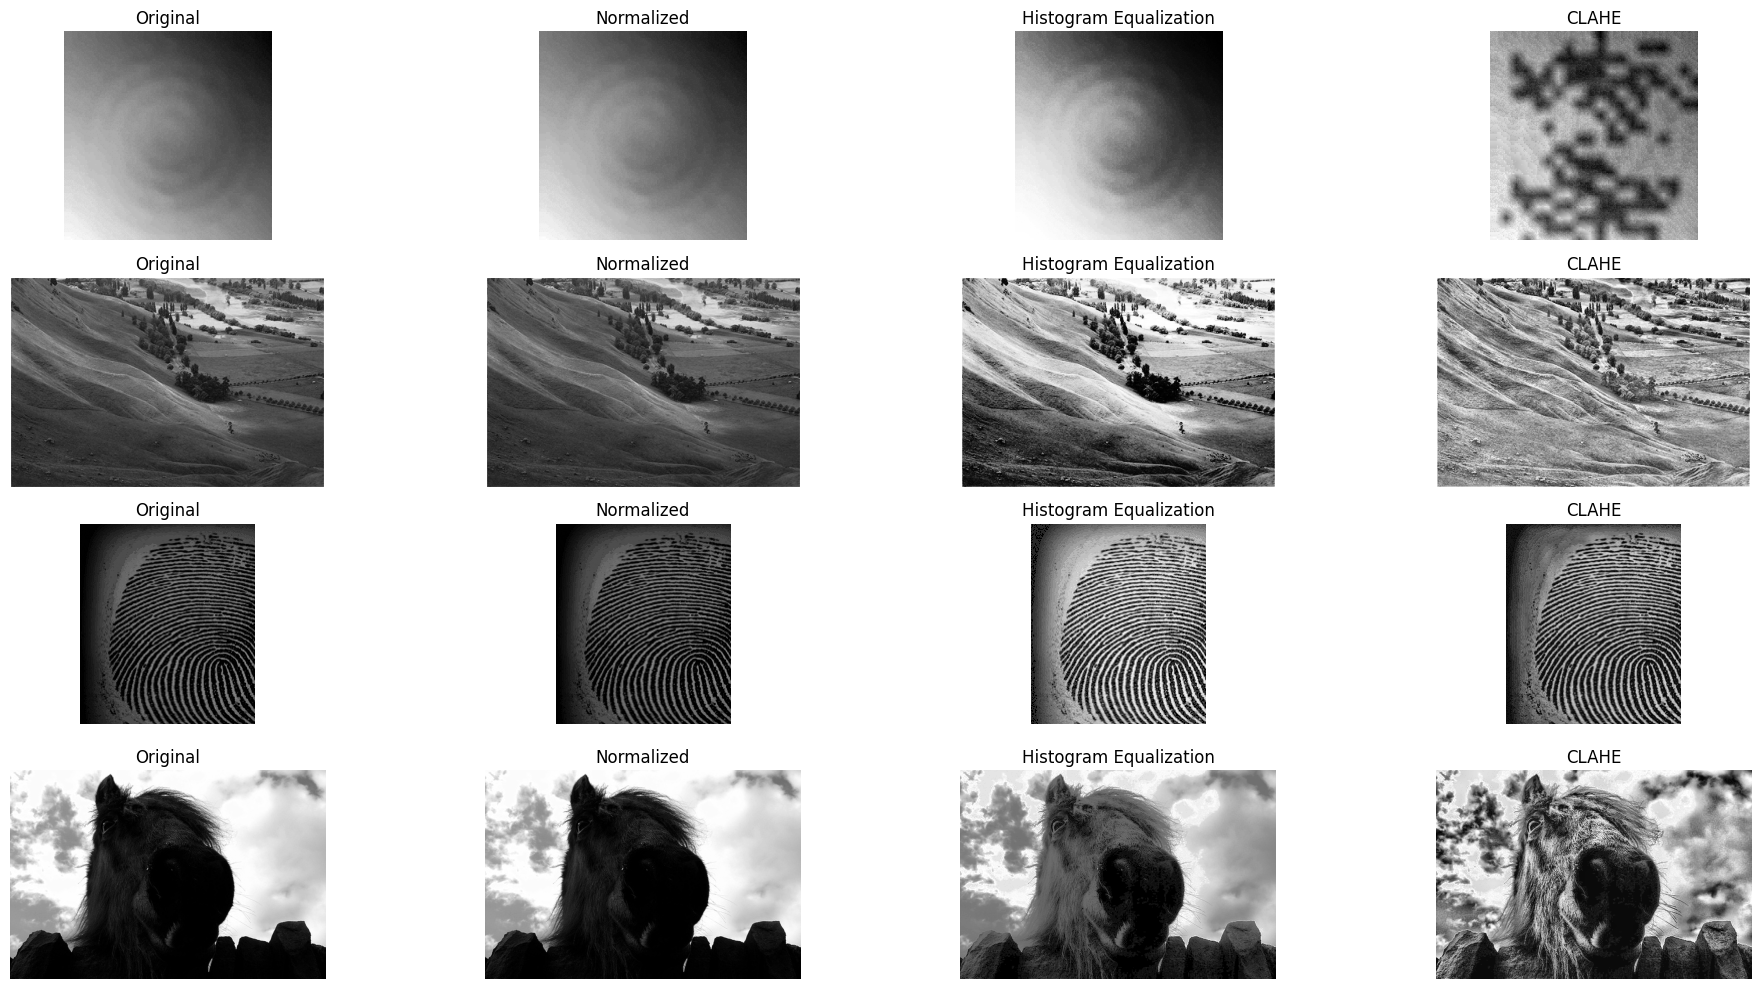

In [11]:
import cv2
import matplotlib.pyplot as plt

def compare_normalize_he_clahe(images):
    clahe = cv2.createCLAHE(clipLimit=10, tileGridSize=(20, 20))

    fig, axs = plt.subplots(len(images), 4, figsize=(20, 10))
    
    for i, img in enumerate(images):
        axs[i, 0].imshow(img, cmap='gray')
        axs[i, 0].set_title("Original")
        axs[i, 0].axis('off')
        
        normalized_img = cv2.normalize(img, None, 0, 255, cv2.NORM_MINMAX)
        axs[i, 1].imshow(normalized_img, cmap='gray')
        axs[i, 1].set_title("Normalized")
        axs[i, 1].axis('off')
        
        he_img = cv2.equalizeHist(img)
        axs[i, 2].imshow(he_img, cmap='gray')
        axs[i, 2].set_title("Histogram Equalization")
        axs[i, 2].axis('off')
        
        clahe_img = clahe.apply(img)
        axs[i, 3].imshow(clahe_img, cmap='gray')
        axs[i, 3].set_title("CLAHE")
        axs[i, 3].axis('off')
    
    plt.tight_layout()
    plt.show()

images = []
for i in range(1, 5): 
    img = cv2.imread(f"hist{i}.bmp", cv2.IMREAD_GRAYSCALE)
    if img is not None:
        images.append(img)
    else:
        print(f"Warning: hist{i}.bmp could not be loaded.")

compare_normalize_he_clahe(images)


## Histogram dla obrazów kolorowych i jego wyrównywanie

1. Wczytaj obraz *lenaRGB.bmp*.
2. Wykonaj konwersję przestrzeni barw z BGR do RGB.
3. Wyświetl wczytany obraz oraz histogram dla każdej składowej przestrzeni barw.
W tym celu można użyć drugiego argumentu wykorzystywanej funkcji (numer kanału).
4. Wykonaj wyrównywanie dla każdej składowej obrazu. Połącz otrzymane składowe w nowy obraz i wyświetl go.
Jaka jest zasadnicza wada takiego podejścia?
5. Przekształć obraz wejściowy do przestrzeni HSV (flaga `cv2.COLOR_BGR2HSV`).
Wyświetl histogramy poszczególnych składowych.
Manipulacji dokonujemy na składowej odpowiadającej za jasność, czyli V.
Wykonaj wyrównywanie histogramu dla tej składowej.
Dokonaj podmiany składowej V i wyświetl rezultat operacji.
Uprzednio przeprowadź konwersję HSV->RGB (flaga `cv2.COLOR_HSV2RGB`).
6. Wykonaj te same operacje dla obrazu *jezioro.jpg*.

In [12]:
fileName = 'lenaRGB.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

fileName = 'jezioro.jpg'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

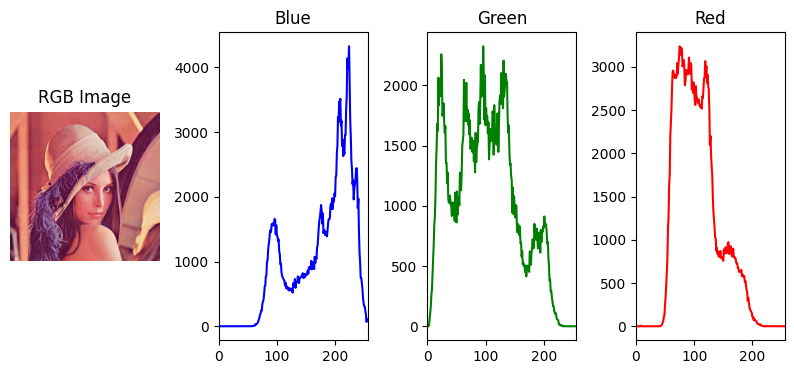

In [13]:
lenaBGR = cv2.imread('lenaRGB.bmp')
lenaRGB = cv2.cvtColor(lenaBGR, cv2.COLOR_BGR2RGB)

fig, ax = plt.subplots(1, 4, figsize=(10, 4))
plt.subplots_adjust(wspace=0.4)

ax[0].imshow(lenaRGB)
ax[0].axis('off')
ax[0].set_title('RGB Image')

for channel in range(3): 
    histogram = cv2.calcHist([lenaRGB], [channel], None, [256], [0, 256])
    ax[channel + 1].plot(histogram, color=['blue', 'green', 'red'][channel])
    ax[channel + 1].set_title(['Blue', 'Green', 'Red'][channel])
    ax[channel + 1].set_xlim([0, 256])

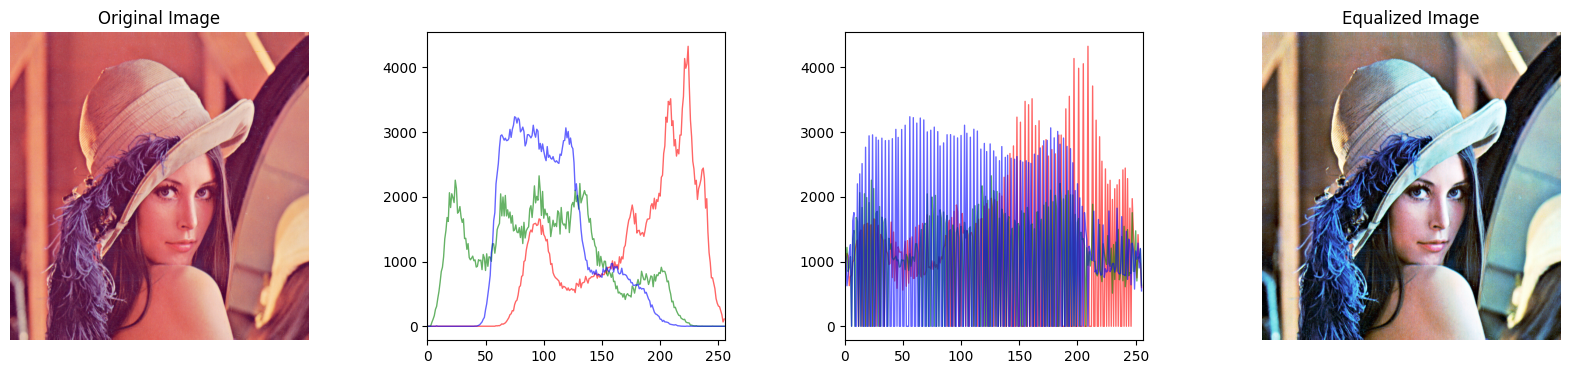

In [20]:
def equalize_histogram(img):
    blue, green, red = cv2.split(img)
    
    equalized_blue = cv2.equalizeHist(blue)
    equalized_green = cv2.equalizeHist(green)
    equalized_red = cv2.equalizeHist(red)
    
    equalized_img = cv2.merge([equalized_blue, equalized_green, equalized_red])
    
    return equalized_img

def print_all(img):
    fig, ax = plt.subplots(1, 4, figsize=(20, 4))
    plt.subplots_adjust(wspace=0.4)
    
    ax[0].imshow(img, aspect='auto')
    ax[0].axis('off')
    ax[0].set_title('Original Image')

    for i, color in enumerate(['red', 'green', 'blue']):
        histogram = cv2.calcHist([img], [i], None, [256], [0, 256])
        ax[1].plot(histogram, color=color, alpha=0.6, linewidth=1)
        ax[1].set_xlim([0, 256])
    
    equalized_img = equalize_histogram(img)
    
    for i, color in enumerate(['red', 'green', 'blue']):
        histogram = cv2.calcHist([equalized_img], [i], None, [256], [0, 256])
        ax[2].plot(histogram, color=color, alpha=0.6, linewidth=1)
        ax[2].set_xlim([0, 256])
    
    
    ax[3].imshow(equalized_img, aspect='auto')
    ax[3].axis('off')
    ax[3].set_title('Equalized Image')

print_all(lenaRGB)

    

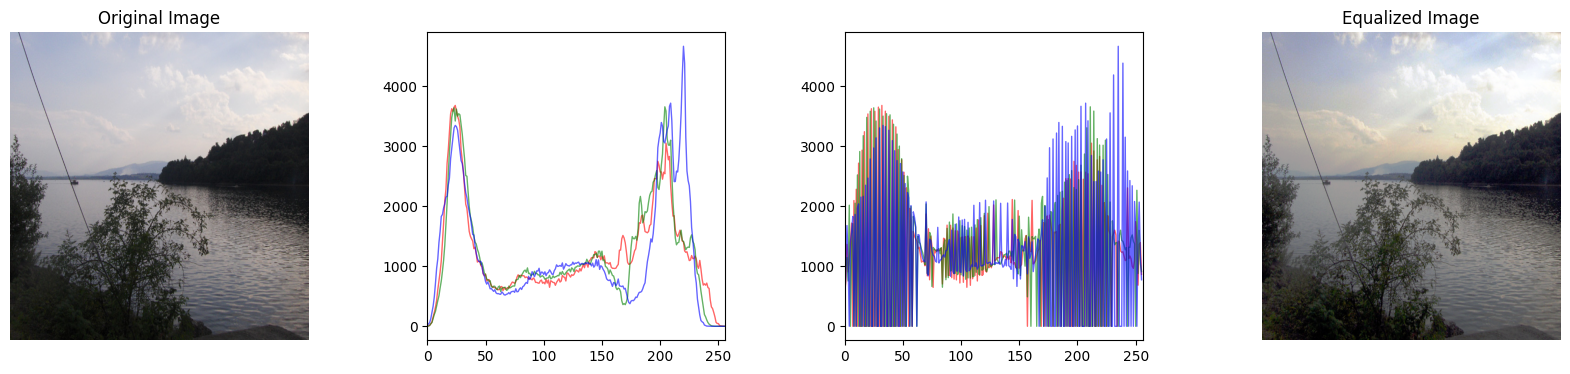

In [21]:
jezioro_rgb = cv2.imread('jezioro.jpg')
jezioro_rgb = cv2.cvtColor(jezioro_rgb, cv2.COLOR_BGR2RGB)

print_all(jezioro_rgb)
